In [81]:
import numpy as np
import matplotlib.pylab as plt
import yt

from scipy import interpolate

from matplotlib import ticker, cm
import matplotlib as mpl
import sys
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from os import chdir as cd

#sys.path.insert(0,"/sakura/ptmp/aubet/Simplification/GR1D_runs/")

In [82]:
!ls *SFHo*1D.dat 
!pwd


FLASH_Gang_ref_SFHo_1D.dat   FLASH_Hann_ref_SFHo_1D.dat
FLASH_Gang_simp_SFHo_1D.dat  FLASH_Hann_simp_SFHo_1D.dat
/sakura/ptmp/aubet/Simplification


In [83]:
list_file = !ls *1D.dat | grep -v "SFHo"
!head -1 s20_ref_SFHo_nb7.dat

  #1 time                   2 mass                    3 x-momentum              4 y-momentum              5 z-momentum              6 E_total                 7 E_kinetic               8 E_internal              9 E_grav                  10 explosion energy       11 E_bind,gain            12 mean shock radius      13 min shock radius       14 mass accretion rate    15 max shock radius       16 magnetic energy        17 central density        18 net heating rate, gain 19 mass in gain region    20 avg entropy in gain    21 neutron star mass      22 pns rotation period    23 pns-x                  24 pns-y                  25 pns-z                  26 com-x                  27 com-y                  28 com-z                  29 average radius of PNS  30 correct PNS radius     31 E_kinetic, theta, gain 32 E_kinetic, phi, gain   33 max(c_s^/v_esc^2)      34 M1 lum tot nue         35 M1 lum tot anue        36 M1 lum tot nux         37 M1 aveE nue            38 M1 aveE anue           39 M1 aveE

In [84]:

for i in list_file:
    globals()[i[:-4]] = np.loadtxt(i,unpack=True,usecols=(0,11,16,17,29,33,34,35,36,37,38,18,13,10,17))
    
    

In [85]:
source_GR1D="GR1D_runs/"

list_GR1D=!cd $source_GR1D && ls -d *SRO*

In [86]:


for i in list_GR1D:
    globals()[i+"_shock"] = np.loadtxt(source_GR1D+i+"/"+"shock_radius_t.dat",unpack=True)
    globals()[i+"_PNS"] =np.loadtxt(source_GR1D+i+"/"+"r_rho1e11.dat",unpack=True)
    globals()[i+"_lum"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_lum.dat",unpack=True)
    globals()[i+"_energ"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_aveenergy_lab.dat",unpack=True)
    


In [87]:
#print([v for k,v in globals().items() if 'shock' in k])

GR1D_shock = dict(filter(lambda item: "SRO" in item[0] and "shock" in item[0] and "s20" in item[0], globals().items()))
GR1D_PNS = dict(filter(lambda item: "SRO" in item[0] and "PNS" in item[0], globals().items()))
GR1D_lum = dict(filter(lambda item: "SRO" in item[0] and "lum" in item[0], globals().items()))
GR1D_energ = dict(filter(lambda item: "SRO" in item[0] and "energ" in item[0], globals().items()))

 
print(list(GR1D_lum.keys()))

['s20_Hann_SRO_full_lum', 's20_Hann_SRO_ref_lum', 's20_ref_SRO_Gang_lum']


1
0
1
0


[Text(0.0, 0, ''),
 Text(0.1, 0, ''),
 Text(0.2, 0, ''),
 Text(0.30000000000000004, 0, ''),
 Text(0.4, 0, ''),
 Text(0.5, 0, '')]

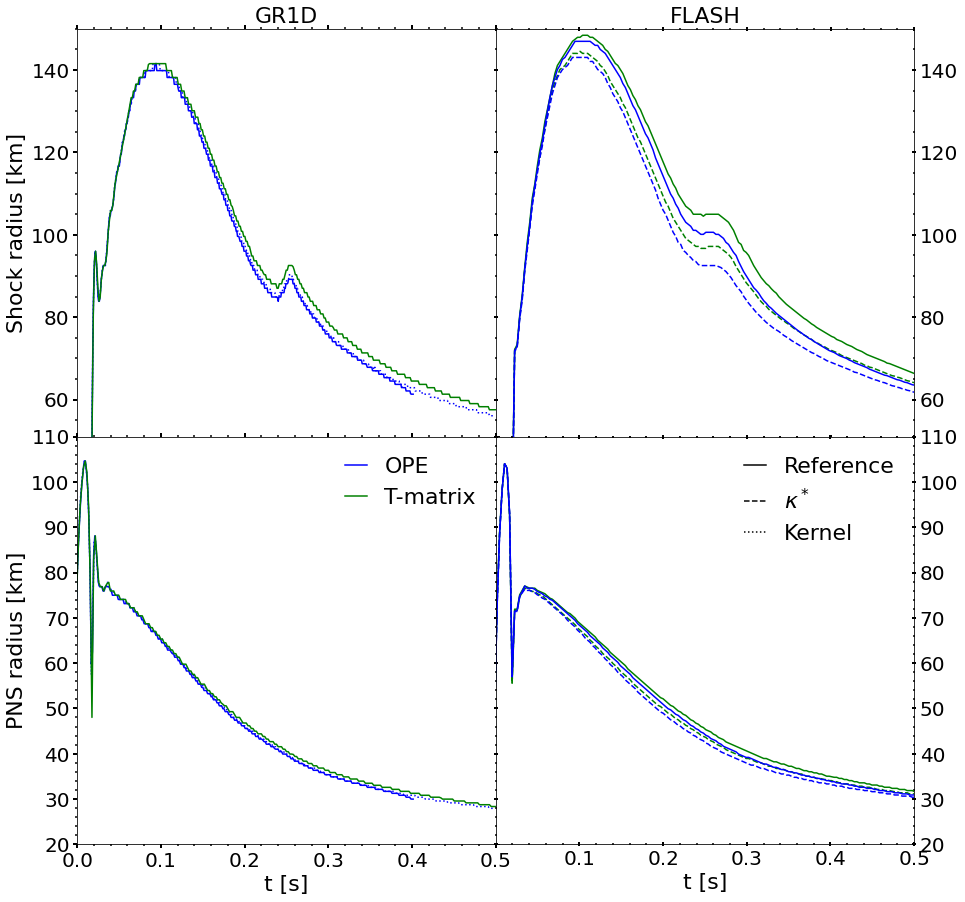

In [88]:
tbounce_SRO=0.299

col=['g','g','b','b']
col_GR1D=['b','b','g','b',"b"]
ticks=['-','--','-','--']
ticks_GR1D=[':','-',"-",'-','--']

factor=1e-5
fig,ax = plt.subplots(2,2,figsize=(15,15))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]


for i in range(len(GR1D_shock.keys())):
    tau=GR1D_shock[list(GR1D_shock.keys())[i]][1]
    x=GR1D_shock[list(GR1D_shock.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_shock[list(GR1D_shock.keys())[i]][0].min(),GR1D_shock[list(GR1D_shock.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax1.plot(time-tbounce_SRO,tau_new*factor,ls=ticks_GR1D[i],color=col_GR1D[i])
    
    tau=GR1D_PNS[list(GR1D_PNS.keys())[i]][1]
    x=GR1D_PNS[list(GR1D_PNS.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_PNS[list(GR1D_PNS.keys())[i]][0].min(),GR1D_PNS[list(GR1D_PNS.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax3.plot(time-tbounce_SRO,tau_new*factor,ls=ticks_GR1D[i],color=col_GR1D[i])



for i in range(len(list_file)):
    tau=globals()[list_file[i][:-4]][1]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax2.plot(time-tbounce_SRO,tau_new*factor,ls=ticks[i],color=col[i])

    tau=globals()[list_file[i][:-4]][4]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax4.plot(time-tbounce_SRO,tau_new*factor,ls=ticks[i],color=col[i])




black_line1, = plt.plot([], [], color='b', linestyle='-')
black_line2, = plt.plot([], [], color='g', linestyle='-')
ax3.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=22,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
black_line3, = plt.plot([], [], color='k', linestyle=':')
ax4.legend([black_line1,black_line2,black_line3],[r"Reference",r"$\kappa^*$","Kernel"],fontsize=22,handlelength=1,frameon=False,loc= "upper right")

ax1.set_xlim([0,0.5])
ax1.set_ylim([51,150])
ax3.set_xlim([0.,0.5])
ax3.set_ylim([20,110])

ax2.set_xlim([0,0.5])
ax2.set_ylim([51,150])
ax4.set_xlim([0.00001,0.5])
ax4.set_ylim([20,110])



for i in range(4) : 
    i=i+1
    print(i%2)
    if (i%2 == 1):
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major', labelsize=20,width=2,length=4)
        test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2)
    else: 
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major',labelright=True,labelleft=False, labelsize=20,width=2,length=4,direction='inout')
        test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2,direction='inout')
        
        
ax3.set_xlabel(r't [s]',fontsize=22)
ax4.set_xlabel(r't [s]',fontsize=22)
ax1.set_ylabel(r'Shock radius [km]',fontsize=22)
ax3.set_ylabel(r'PNS radius [km]',fontsize=22)
ax1.set_title("GR1D",fontsize=22)
ax2.set_title("FLASH",fontsize=22)



plt.subplots_adjust(wspace=0,hspace=0)
ax1.set_xticklabels([])    
ax2.set_xticklabels([])    

In [96]:
print(GR1D_lum.keys())
print(list_file
)

dict_keys(['s20_Hann_SRO_full_lum', 's20_Hann_SRO_ref_lum', 's20_ref_SRO_Gang_lum'])
['FLASH_Gang_ref_1D.dat', 'FLASH_Gang_simp_1D.dat', 'FLASH_Hann_ref_1D.dat', 'FLASH_Hann_simp_1D.dat']


1
0
1
0


[Text(0.0, 0, ''),
 Text(0.1, 0, ''),
 Text(0.2, 0, ''),
 Text(0.30000000000000004, 0, ''),
 Text(0.4, 0, ''),
 Text(0.5, 0, '')]

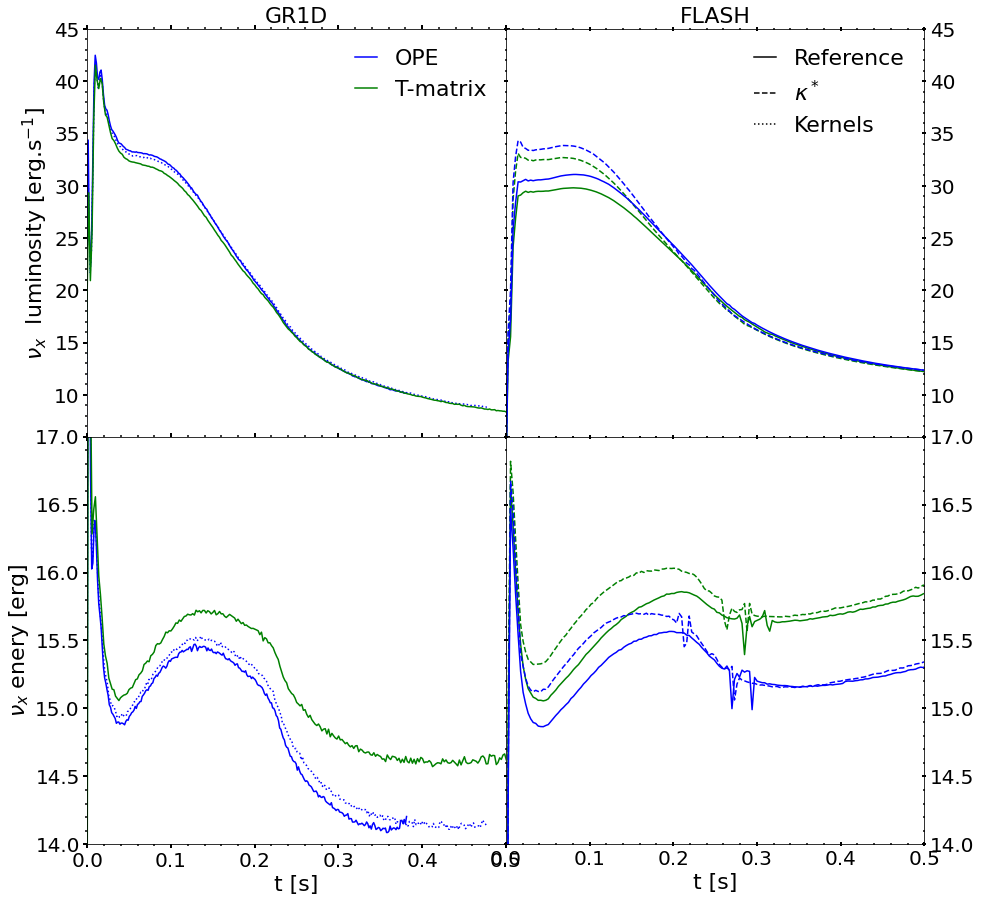

In [94]:
tbounce_SFHo=0.319

col=['g','g','b','b']
col_GR1D=['b','b','g','b',"b"]
ticks=['-','--','-','--']
ticks_GR1D=[':','-',"-",'-','--']

factor=0.25

fig,ax = plt.subplots(2,2,figsize=(15,15))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]

for i in range(len(GR1D_lum.keys())):
    tau=GR1D_lum[list(GR1D_lum.keys())[i]][3]
    x=GR1D_lum[list(GR1D_lum.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_lum[list(GR1D_lum.keys())[i]][0].min(),GR1D_lum[list(GR1D_lum.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax1.plot(time-tbounce_SFHo,tau_new/4e51,ls=ticks_GR1D[i],color=col_GR1D[i])
    
    tau=GR1D_energ[list(GR1D_energ.keys())[i]][3]
    x=GR1D_energ[list(GR1D_energ.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_energ[list(GR1D_energ.keys())[i]][0].min(),GR1D_energ[list(GR1D_energ.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax3.plot(time-tbounce_SFHo,tau_new,ls=ticks_GR1D[i],color=col_GR1D[i])

for i in range(len(list_file)):
    tau=globals()[list_file[i][:-4]][7]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax2.plot(time-tbounce_SFHo,tau_new*factor,ls=ticks[i],color=col[i])

    tau=globals()[list_file[i][:-4]][10]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax4.plot(time-tbounce_SFHo,tau_new,ls=ticks[i],color=col[i])



ax1.set_xlim([0,0.5])
ax3.set_xlim([0,0.5])
ax1.set_ylim([6,45])
ax3.set_ylim([14,17])

ax2.set_xlim([0,0.5])
ax4.set_xlim([0,0.5])
ax2.set_ylim([6,45])
ax4.set_ylim([14,17])


black_line1, = plt.plot([], [], color='b', linestyle='-')
black_line2, = plt.plot([], [], color='g', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=22,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
black_line3, = plt.plot([], [], color='k', linestyle=':')
ax2.legend([black_line1,black_line2,black_line3],[r"Reference",r"$\kappa^*$",'Kernels'],fontsize=22,handlelength=1,frameon=False,loc= "upper right")




for i in range(4) : 
    i=i+1
    print(i%2)
    if (i%2 == 1):
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major', labelsize=20,width=2,length=4)
        test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2)
    else: 
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major',labelright=True,labelleft=False, labelsize=20,width=2,length=4,direction='inout')
        test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2,direction='inout')
        
        
ax3.set_xlabel(r't [s]',fontsize=22)
ax4.set_xlabel(r't [s]',fontsize=22)
ax1.set_ylabel(r'$\nu_x$  luminosity [erg.s$^{-1}$]',fontsize=22)
ax3.set_ylabel(r'$\nu_x$ enery [erg]',fontsize=22)
ax1.set_title("GR1D",fontsize=22)
ax2.set_title("FLASH",fontsize=22)



plt.subplots_adjust(wspace=0,hspace=0)
ax1.set_xticklabels([])    
ax2.set_xticklabels([])    